In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# MERGING 12 MONTHS FILE INTO 1 CSV FILE
all_month_files = pd.DataFrame()
for i in os.listdir(r"C:\Users\gaurav\PROJECTS\D_A\SALES_ANALYSIS\Sales_Dataset"):
    df = pd.read_csv(f"C:\\Users\\gaurav\\PROJECTS\\D_A\\SALES_ANALYSIS\\Sales_Dataset\\{i}")
    all_month_files= pd.concat([all_month_files,df])


all_month_files.to_csv(r"C:\Users\gaurav\PROJECTS\D_A\SALES_ANALYSIS\Sales_Dataset\all_months_combine_file.csv")

In [3]:
all_month_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# ROWS AND COLUMNS
all_month_files.shape

(186850, 6)

In [5]:
all_month_files.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Cleaning up the data

In [6]:
all_month_files.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# DROPING NULL VALUES
all_month_files.dropna(inplace=True)

In [8]:
all_month_files.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
temp_df = all_month_files[all_month_files['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
# DROPING DUPLICATE VALUES
all_month_files = all_month_files[all_month_files['Order Date'].str[0:2] != 'Or']


## ADDING NEW COLUMN

### MONTH

In [11]:
all_month_files['Month']= all_month_files['Order Date'].str[0:2]

In [12]:
all_month_files['Month']= all_month_files['Month'].astype('int')

### SALES

In [13]:
all_month_files['Price Each']= all_month_files['Price Each'].astype('float')
all_month_files['Quantity Ordered']= all_month_files['Quantity Ordered'].astype('int')


all_month_files['Sales'] =  all_month_files['Price Each'] * all_month_files['Quantity Ordered'] 


### CITY

In [14]:
def get_city(address):
    return address.split(',')[1]

In [15]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [16]:
all_month_files['City']=all_month_files['Purchase Address'].apply( lambda x : f"{get_city(x)} ({get_state(x)})")

### HOUR

In [17]:
all_month_files['Order Date']= pd.to_datetime(all_month_files['Order Date'])


all_month_files['Hour']= all_month_files['Order Date'].dt.hour

### MINUTE

In [18]:
all_month_files['Minute']= all_month_files['Order Date'].dt.minute

### Question 1: What was the best month for sales? How much was earned that month?

In [19]:
ax= all_month_files.groupby('Month',as_index=False)['Sales'].sum()
ax

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


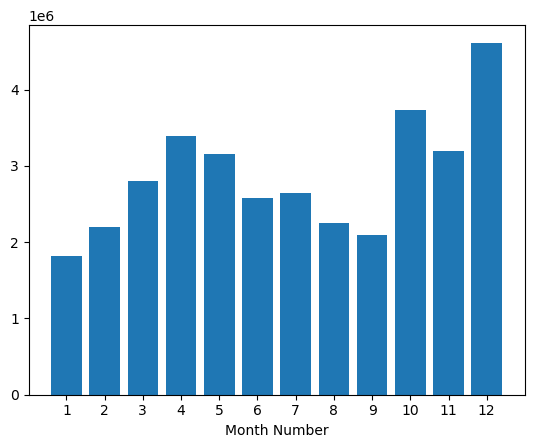

In [20]:
plt.bar(x='Month',height='Sales',data=ax)
months = range(1,13)
plt.xticks(months)
plt.xlabel('Month Number')
plt.show()

#### December has the highest amount of sales which is 4613443.34 US Dollars

### Question 2: Which city has the highest number of sales?

In [21]:
aa= all_month_files.groupby('City',as_index=False)['Sales'].sum()
aa

,City,Sales
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


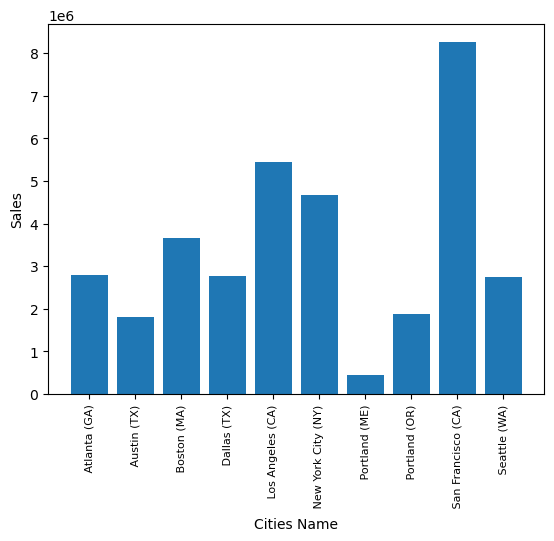

In [22]:
cities= all_month_files['City'].unique()
plt.bar(aa['City'],aa['Sales'])
plt.xticks(cities,rotation ='vertical',size=8)
plt.ylabel('Sales')
plt.xlabel('Cities Name')
plt.show()

#### San Francisco has the highest number of sales which is 8262203.91 US Dollars

### Question 3: What time should we display advertisment to maximise likelihood of customer's buying product?

In [23]:
ax= all_month_files.groupby('Hour').count()

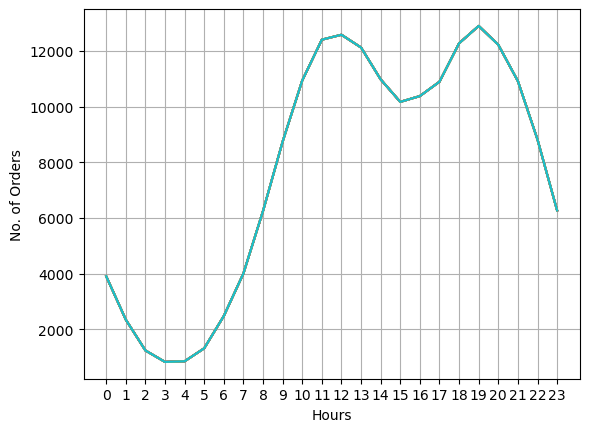

In [24]:
hour= range(0,24)
plt.plot(ax)
plt.xticks(hour)
plt.rcParams["figure.figsize"] = (8,4)
plt.xlabel('Hours')
plt.grid()
plt.ylabel('No. of Orders')
plt.show()

#### The best time to display advertisement are 11 am and 7 pm


### Question 4: What products are most often sold together?

In [25]:
df = all_month_files[all_month_files['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [26]:
from itertools import combinations
from collections import Counter

count= Counter()

In [27]:
for i in df['Grouped']:
    row_list= i.split(',')
    count.update(Counter(combinations(row_list,2)))

for k,v in count.most_common(10):
    print(k,v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### These above prouducts are sold most often together

### Question 5: What product sold the most? Why do you think it sold the most?

In [28]:
[all_month_files['Product'].mode()]

[0    USB-C Charging Cable
 Name: Product, dtype: object]

In [29]:
grouped_product= all_month_files.groupby('Product',as_index=False)['Quantity Ordered']

In [30]:
ax= grouped_product.sum()
ax

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


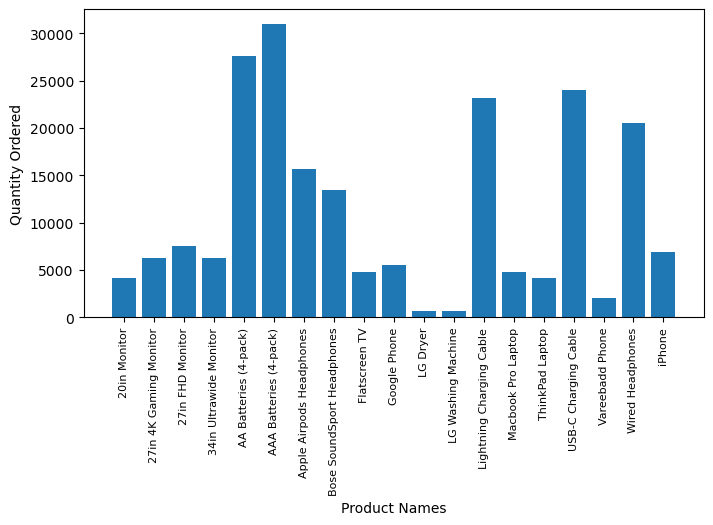

In [31]:
plt.bar(x='Product',height='Quantity Ordered',data=ax)
plt.xticks(ax['Product'],rotation='vertical',size=8)
plt.xlabel('Product Names')
plt.ylabel('Quantity Ordered')
plt.show()

In [32]:
prices = all_month_files.groupby('Product',as_index=False)['Price Each'].mean()

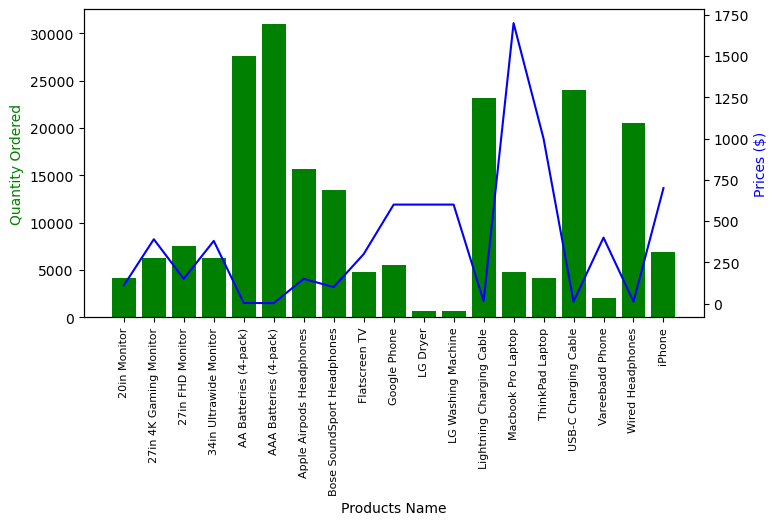

In [33]:
products = ax['Product']
price_each = prices['Price Each']
quantity = ax['Quantity Ordered']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity,color= 'g')
ax2.plot(products,price_each, 'b-')


ax1.set_xlabel('Products Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

#### The most sold products are AAA Batteries (4-pack) and AA Batteries (4-pack) . I think it sold the most beacuse they have the lowest price .